For more details on UMAP visit the link https://umap-learn.readthedocs.io/en/latest/clustering.html and https://github.com/lmcinnes/umap/blob/master/doc/clustering.rst

#Install HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise)

In [ ]:
pip install hdbscan

     |████████████████████████████████| 4.7MB 3.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.26-cp36-cp36m-linux_x86_64.whl size=2301794 sha256=5ce4c71bb23cd38e035a7536a98ef6d189b6587ec623f1b8d666f0512a6c841b
  Stored in directory: /root/.cache/pip/wheels/82/38/41/372f034d8abd271ef7787a681e0a47fc05d472683a7eb088ed
Successfully built hdbscan


#Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
import umap
from sklearn.metrics import adjusted_rand_score

In [ ]:
import hdbscan

In [ ]:
digits = load_digits()
digits.images.shape

(1797, 8, 8)

In [ ]:
data_x=digits.data
data_y=digits.target

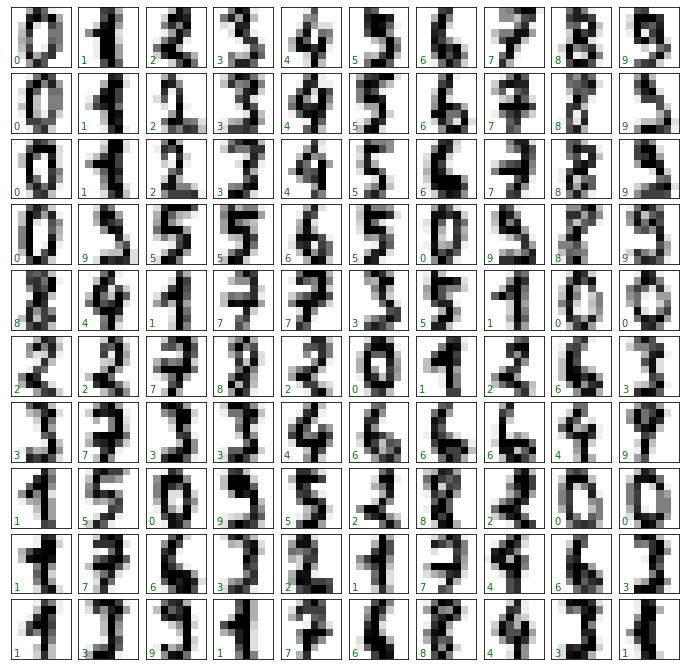

In [ ]:
fig,ax =plt.subplots(10,10,figsize=(12,12),subplot_kw={'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1,wspace=0.1))
for i,axes in enumerate(ax.flat):
  axes.imshow(digits.images[i],cmap='binary')
  axes.text(0.05,0.05,str(digits.target[i]),transform=axes.transAxes,color='green')

#UMAP - Uniform Manifold Approximation and Projection for Dimension Reduction



In [ ]:
standard_embedding=umap.UMAP(random_state=42).fit_transform(data_x)

In [ ]:
standard_embedding

array([[17.88365  ,  8.607578 ],
       [-7.320162 , 11.27809  ],
       [-4.5195584, 11.427304 ],
       ...,
       [-4.965218 , 10.070849 ],
       [-0.7232425,  6.0528884],
       [-4.4568877, 10.055157 ]], dtype=float32)

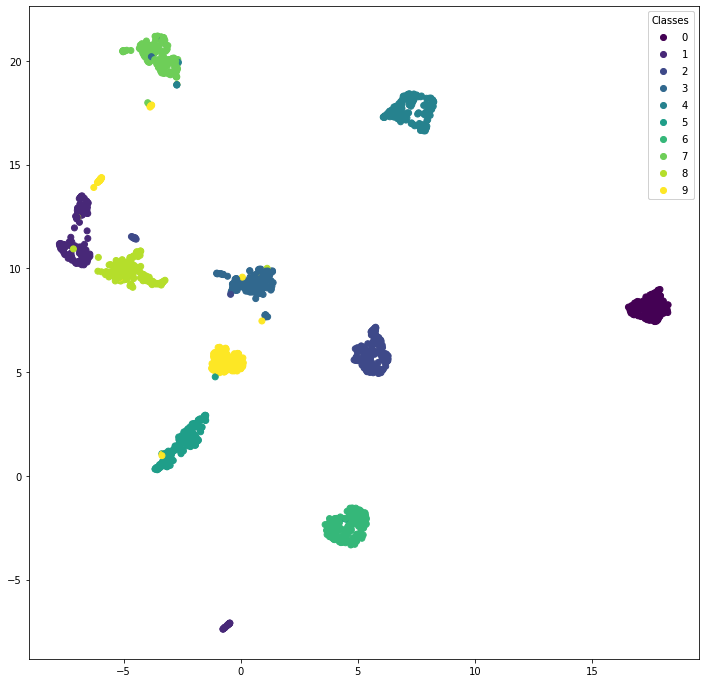

In [ ]:
#Visualize the data after dimension reduction

fig, ax = plt.subplots(figsize=(12,12))
scatter = ax.scatter(standard_embedding[:,0],standard_embedding[:,1], c=data_y, )
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),loc="upper right", title="Classes")
ax.add_artist(legend1)


#HDBSCAN(Hierarchical Density-Based Spatial Clustering of Applications with Noise)

In [ ]:
hdbscan_labels=hdbscan.HDBSCAN().fit_predict(data_x)

In [ ]:
hdbscan_labels

array([ 2, 19, -1, ..., -1, -1, -1])

-1 means outliers

In [ ]:
clustered=(hdbscan_labels >= 0)

In [ ]:
clustered

array([ True,  True, False, ..., False, False, False])

In [ ]:
standard_embedding[clustered,0]

array([17.88365  , -7.320162 ,  1.0031887, ...,  6.740029 , -0.7904953,
       16.872265 ], dtype=float32)

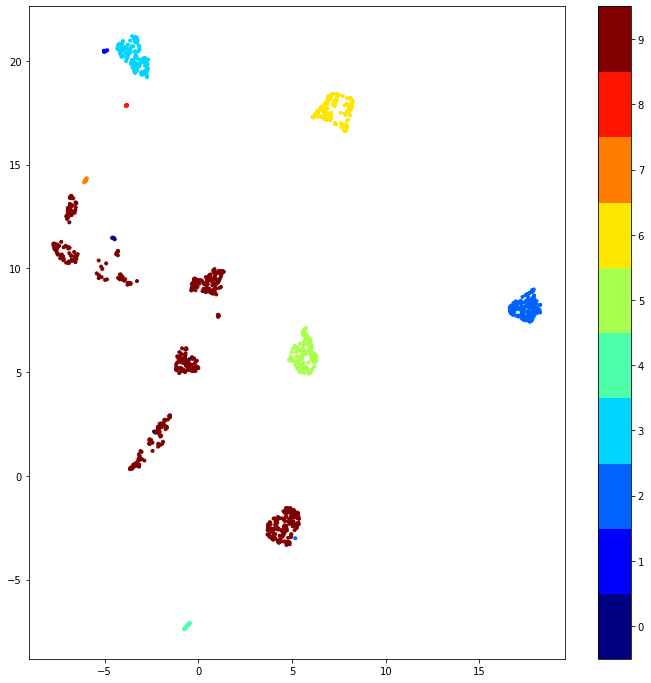

In [ ]:
plt.figure(figsize=(12,12))
vis_x = standard_embedding[clustered,0]
vis_y = standard_embedding[clustered,1]
plt.scatter(vis_x, vis_y, c=hdbscan_labels[clustered], cmap=plt.cm.get_cmap("jet", 10), marker='.')
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

#Score after removing outliers

In [ ]:
clustered=(hdbscan_labels >=0)
(adjusted_rand_score(data_y[clustered],hdbscan_labels[clustered]))

0.9040845016096042

#Score without removing outliers

In [ ]:
(adjusted_rand_score(data_y,hdbscan_labels))

0.4869574965473278